In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
from dotenv import load_dotenv  
load_dotenv('c:/Users/tunchiie/Documents/Data Projects/GenreGenie/var.env')
%matplotlib inline

In [2]:
api_key = os.getenv("KEY")
base_url = "https://api.themoviedb.org/3"
pages = 500
movies_db = []

## Data Collecting

In [3]:
def get_popular_movies(page=1):
    
    url = f"{base_url}/movie/popular?api_key={api_key}&language=en-US&page={page}"
    
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.RequestException as e:
        print(f"[ERROR] Failed to fetch page {page}: {e}")
        return []
    else:
        return response.json()

    
for page in range(1, pages + 1):
    movies = get_popular_movies(page)
    if 'results' in movies:
        #store each page in a database
        movies_db.extend(movies['results'])

movies_db = pd.DataFrame(movies_db)

In [4]:
movies_db.head(5)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/fTrQsdMS2MUw00RnzH0r3JWHhts.jpg,"[28, 80, 53]",1197306,en,A Working Man,Levon Cade left behind a decorated military ca...,1086.1895,/xUkUZ8eOnrOnnJAfusZUqKYZiDu.jpg,2025-03-26,A Working Man,False,6.327,402
1,False,/op3qmNhvwEvyT7UFyPbIfQmKriB.jpg,"[14, 12, 28]",324544,en,In the Lost Lands,A queen sends the powerful and feared sorceres...,546.4711,/t6HJH3gXtUqVinyFKWi7Bjh73TM.jpg,2025-02-27,In the Lost Lands,False,6.315,259
2,False,/56lv8d5yst1SBhw1uR3iGFd1R43.jpg,"[10751, 35, 12, 14]",950387,en,A Minecraft Movie,Four misfits find themselves struggling with o...,543.1977,/yFHHfHcUgGAxziP1C3lLt0q2T4s.jpg,2025-03-31,A Minecraft Movie,False,6.200,692
3,False,/jhL4eTpccoZSVehhcR8DKLSBHZy.jpg,"[28, 53, 878]",822119,en,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,376.8807,/pzIddUEMWhWzfvLI3TwxUG2wGoi.jpg,2025-02-12,Captain America: Brave New World,False,6.142,1590
4,False,/k32XKMjmXMGeydykD32jfER3BVI.jpg,"[28, 9648, 18]",1045938,en,G20,After the G20 Summit is overtaken by terrorist...,337.4409,/wv6oWAleCJZUk5htrGg413t3GCy.jpg,2025-04-09,G20,False,6.675,349


In [5]:
movies_db.describe()

,id,popularity,vote_average,vote_count
count,1.000000e+04,10000.000000,10000.00000,10000.000000
mean,3.834832e+05,8.062202,6.38318,1746.590100
std,4.119602e+05,17.821045,1.40244,3301.142621
min,1.100000e+01,1.749800,0.00000,0.000000
25%,1.873600e+04,4.002425,5.97350,102.750000
50%,2.740020e+05,5.113400,6.57900,498.000000
75%,6.313178e+05,7.719850,7.16700,1851.000000
max,1.464506e+06,1086.189500,10.00000,37382.000000


In [6]:
# Drop columns
to_drop = ['adult', 'backdrop_path', 'poster_path', 'video', 'title']
movies_db.drop(to_drop, axis = 1, inplace = True)

# Rename columns
movies_db.rename(columns = {'original_language':'language', 'original_title' :'title'},inplace = True)

In [7]:
#check if there are any null values that need to be cleaned
movies_db.isnull().sum()

genre_ids       0
id              0
language        0
title           0
overview        0
popularity      0
release_date    0
vote_average    0
vote_count      0
dtype: int64

In [8]:
# drop all row with duplicate movies or if no title or id has been assigned
movies_db.drop_duplicates(subset='title',inplace=True)
movies_db.dropna(subset=['title', 'id'], how='all', inplace=True)

In [9]:
movies_db.fillna('')

,genre_ids,id,language,title,overview,popularity,release_date,vote_average,vote_count
0,"[28, 80, 53]",1197306,en,A Working Man,Levon Cade left behind a decorated military ca...,1086.1895,2025-03-26,6.327,402
1,"[14, 12, 28]",324544,en,In the Lost Lands,A queen sends the powerful and feared sorceres...,546.4711,2025-02-27,6.315,259
2,"[10751, 35, 12, 14]",950387,en,A Minecraft Movie,Four misfits find themselves struggling with o...,543.1977,2025-03-31,6.200,692
3,"[28, 53, 878]",822119,en,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,376.8807,2025-02-12,6.142,1590
4,"[28, 9648, 18]",1045938,en,G20,After the G20 Summit is overtaken by terrorist...,337.4409,2025-04-09,6.675,349
...,...,...,...,...,...,...,...,...,...
9995,[18],14174,en,Lie with Me,"Happily unattached, the sexually voracious Lei...",3.3091,2006-02-14,5.200,282
9996,"[35, 10749]",33358,en,The Mostly Unfabulous Social Life of Ethan Green,Ethan Green (Daniel Letterle) has no problem f...,3.2953,2005-04-29,5.300,36
9997,"[18, 16, 878, 12, 28]",467169,ja,交響詩篇エウレカセブン ハイエボリューション1,It all begins with the story that was left unt...,3.7210,2017-09-16,5.400,5
9998,"[28, 12, 878]",241697,ja,仮面ライダー×スーパー戦隊 スーパーヒーロー大戦,The Kamen Rider Club discovers that the Dai-Za...,3.6426,2012-04-21,6.300,13


In [10]:
# convert release date to datetime to assign year and month
movies_db['release_date'] = pd.to_datetime(movies_db['release_date'], format='%Y-%m-%d', errors='coerce')
movies_db['release_month'] = movies_db['release_date'].dt.month_name()
movies_db['release_year'] = movies_db['release_date'].dt.year

In [11]:
# check which rows have an assigned year
movies_db.fillna({'release_year' : 0.0}, inplace=True)

In [12]:
# convert year assigned to integer type
movies_db['release_year'] = movies_db['release_year'].apply(lambda x : int(x) if isinstance(x, float) else x)

In [13]:
url = "https://api.themoviedb.org/3/genre/movie/list?language=en"

authorization = {
    "accept": "application/json",
    "Authorization": F'Bearer {os.getenv('BEARER_TOKEN')}'
}

try:
    response = requests.get(url, headers=authorization)
    
    response.raise_for_status()
    
except requests.RequestException as e:
    print(f"[ERROR] Failed to fetch genres: {e}")

else:
    genre_dict = pd.DataFrame(response.json()['genres'] )
    
    genre_dict.set_index('id', inplace=True)

In [14]:
def find_genre(genre_list=[]):
    try:
        return sorted([genre_dict.loc[gid]['name'] for gid in genre_list])
    except KeyError:
        return []

In [15]:
#populate genre names using their corresponding id's
movies_db['genre'] = movies_db['genre_ids'].apply(find_genre)

In [16]:
movies_db.head()

,genre_ids,id,language,title,overview,popularity,release_date,vote_average,vote_count,release_month,release_year,genre
0,"[28, 80, 53]",1197306,en,A Working Man,Levon Cade left behind a decorated military ca...,1086.1895,2025-03-26,6.327,402,March,2025,"[Action, Crime, Thriller]"
1,"[14, 12, 28]",324544,en,In the Lost Lands,A queen sends the powerful and feared sorceres...,546.4711,2025-02-27,6.315,259,February,2025,"[Action, Adventure, Fantasy]"
2,"[10751, 35, 12, 14]",950387,en,A Minecraft Movie,Four misfits find themselves struggling with o...,543.1977,2025-03-31,6.200,692,March,2025,"[Adventure, Comedy, Family, Fantasy]"
3,"[28, 53, 878]",822119,en,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,376.8807,2025-02-12,6.142,1590,February,2025,"[Action, Science Fiction, Thriller]"
4,"[28, 9648, 18]",1045938,en,G20,After the G20 Summit is overtaken by terrorist...,337.4409,2025-04-09,6.675,349,April,2025,"[Action, Drama, Mystery]"


In [17]:
movie_dataset = movies_db.copy()
movie_dataset['genre'] = movie_dataset['genre'].apply(lambda x: '+'.join(x))
movie_dataset.to_csv('movie_dataset.csv')

In [18]:
most_popular = movies_db[(movies_db['popularity'] > 10) == True].copy()

In [19]:
most_popular.head()

,genre_ids,id,language,title,overview,popularity,release_date,vote_average,vote_count,release_month,release_year,genre
0,"[28, 80, 53]",1197306,en,A Working Man,Levon Cade left behind a decorated military ca...,1086.1895,2025-03-26,6.327,402,March,2025,"[Action, Crime, Thriller]"
1,"[14, 12, 28]",324544,en,In the Lost Lands,A queen sends the powerful and feared sorceres...,546.4711,2025-02-27,6.315,259,February,2025,"[Action, Adventure, Fantasy]"
2,"[10751, 35, 12, 14]",950387,en,A Minecraft Movie,Four misfits find themselves struggling with o...,543.1977,2025-03-31,6.200,692,March,2025,"[Adventure, Comedy, Family, Fantasy]"
3,"[28, 53, 878]",822119,en,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,376.8807,2025-02-12,6.142,1590,February,2025,"[Action, Science Fiction, Thriller]"
4,"[28, 9648, 18]",1045938,en,G20,After the G20 Summit is overtaken by terrorist...,337.4409,2025-04-09,6.675,349,April,2025,"[Action, Drama, Mystery]"


##### Top 5 Genres Overall

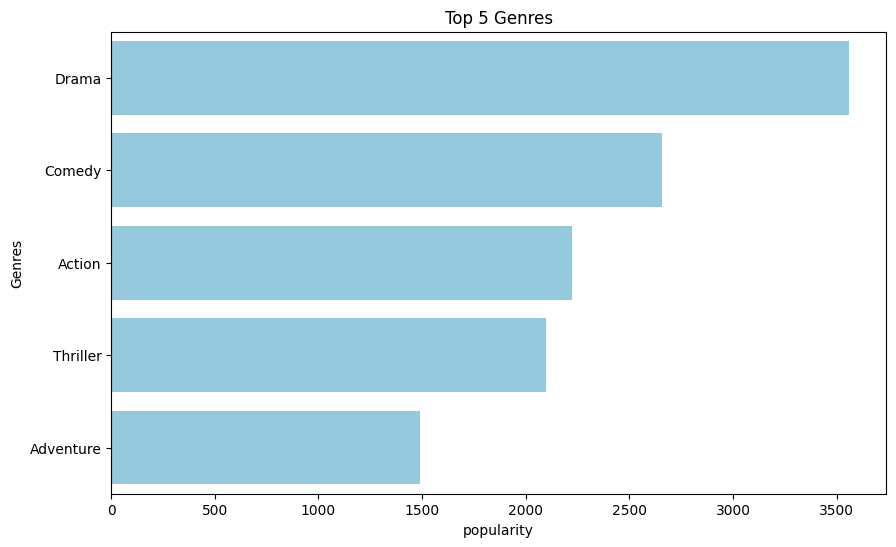

In [20]:
plt.figure(figsize=(10, 6))
exploded_genres = movies_db.explode('genre', ignore_index=True)
genre_frequency = exploded_genres['genre'].value_counts()
top_genres = genre_frequency.head(5)
sns.barplot(x=top_genres.values, y=top_genres.index, orient ='h', color='skyblue')
plt.title('Top 5 Genres')
plt.xlabel('popularity')
plt.ylabel('Genres')
plt.show()

##### Top 5 Genres from Popular Movies

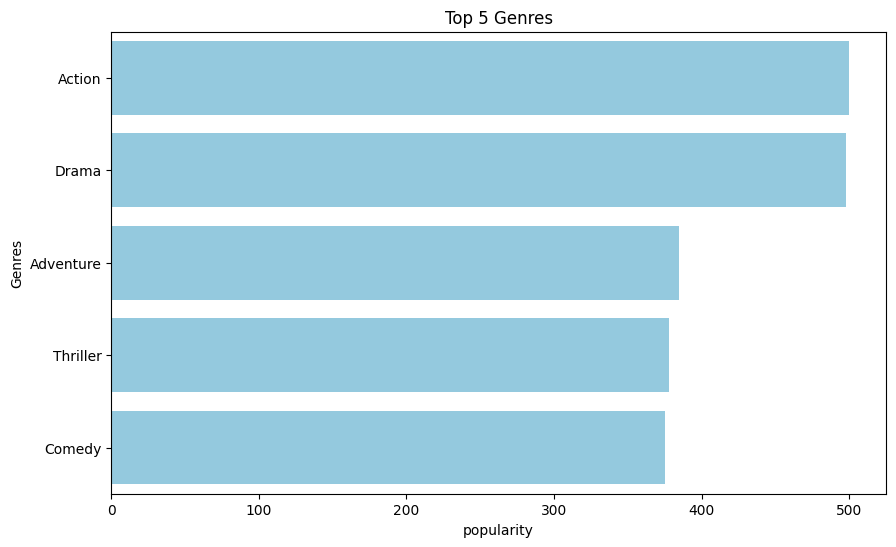

In [21]:
plt.figure(figsize=(10, 6))
exploded_genres = most_popular.explode('genre', ignore_index=True)
genre_frequency = exploded_genres['genre'].value_counts()
top_genres = genre_frequency.head(5)
sns.barplot(x=top_genres.values, y=top_genres.index, orient ='h', color='skyblue')
plt.title('Top 5 Genres')
plt.xlabel('popularity')
plt.ylabel('Genres')
plt.show()

In [22]:
target_genres = {}

def contains_genres(genre_list,all=True):
    # Make sure the list of genres required are in the right format
    new_target_genres = set(genre.capitalize() for genre in target_genres)
    if all:
        return new_target_genres.issubset(set(genre_list))
    else:
        return any(item in genre_list for item in new_target_genres)

In [23]:
target_genres = set(top_genres.index)
is_target = pd.DataFrame(movies_db['genre'].apply(contains_genres, args=(False,)))
top_movies = movies_db[is_target['genre'] == True].copy()  
top_movies['genre'] = top_movies['genre'].apply(lambda x: [genre.capitalize() \
                                                           for genre in x if genre.capitalize() in target_genres])
top_movies = top_movies.explode('genre')
grouped_year = pd.DataFrame(top_movies.groupby(['release_year', 'genre'], as_index=False).agg({'popularity' : 'mean', 'title' :'count'}))
grouped_year.rename({'title':'count'}, axis=1, inplace=True)
grouped_year.head(5)

,release_year,genre,popularity,count
0,0,Action,6.653971,7
1,0,Adventure,6.278100,2
2,0,Comedy,4.510380,5
3,0,Drama,4.087100,3
4,0,Thriller,6.686929,7


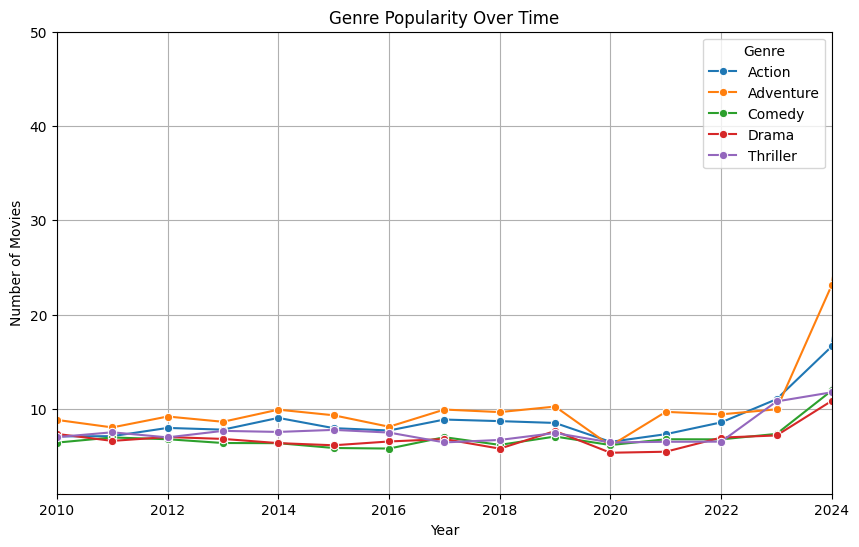

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_year, x="release_year", y="popularity", hue="genre", marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Genre Popularity Over Time")
plt.legend(title="Genre")
plt.xlim(2010, 2024)
plt.ylim(1, 50)
plt.grid(True)
plt.show()

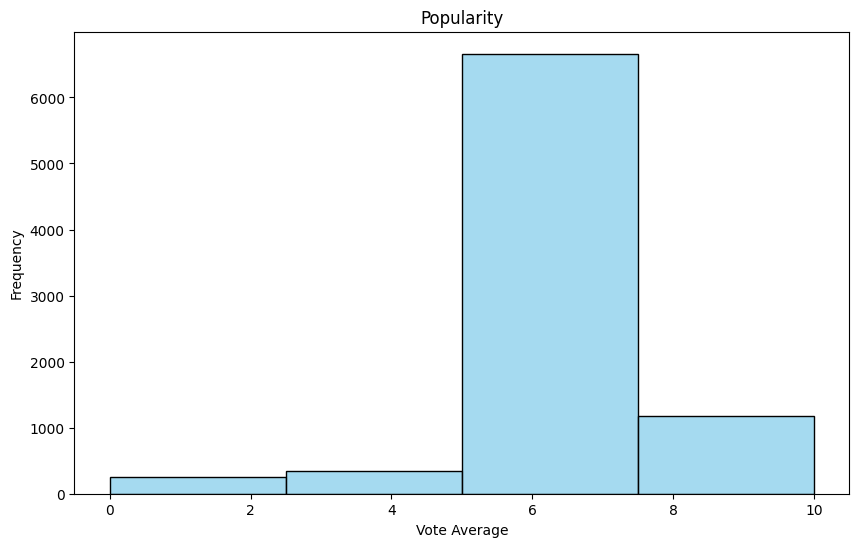

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_db, x='vote_average', bins=4, color='skyblue')
plt.title('Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

In [26]:
hidden_gems = movies_db[(movies_db['popularity'] < 10) & (movies_db['vote_average'] > 8.5)].copy()
hidden_gems = hidden_gems.explode('genre')
hidden_gems = hidden_gems.sort_values(by='vote_average', ascending=False)
group_hidden = hidden_gems.groupby(['genre'], as_index=False)['title'].count()

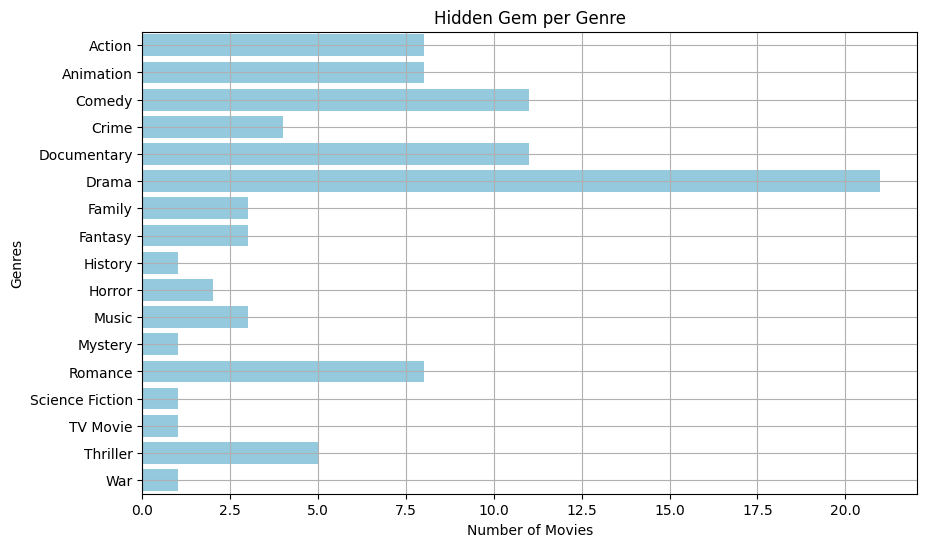

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=group_hidden, x='title', y='genre', orient ='h', color='skyblue')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Hidden Gem per Genre')
plt.grid(True)
plt.show()

## Movie Recommendations

In [28]:
target_genres = {'Action', 'Romance'}
is_target = pd.DataFrame(movies_db['genre'].apply(contains_genres, args=(True,)))
target_movies = movies_db[is_target['genre'] == True].sort_values(by='popularity')
print('\033[1m' + 'Recommended Movies based on Genre: ' + '\033[0m')
for n, title in enumerate(target_movies['title'], start=1):
    print(f'{n}. {title}')

Recommended Movies based on Genre: 
1. The Saint
2. Sword of Lancelot
3. ரெட்ரோ
4. 劇場版 デート・ア・ライブ 万由里ジャッジメント
5. The Out-Laws
6. Nowhere to Run
7. Silent Rage
8. Modern Vampires
9. 飛龍猛將
10. 劇場版 マクロスΔ 激情のワルキューレ
11. The Adventures of Robin Hood
12. Inferno
13. Sara
14. The Bad Batch
15. The Marrying Man
16. Innocent Blood
17. ダーティペア 劇場版
18. 劇場版「空の境界」Remix -Gate of seventh heaven-
19. Catchfire
20. Gun Shy
21. X
22. 传说
23. The Quick and the Dead
24. Pink Cadillac
25. Open Range
26. The Mexican
27. Hellfighters
28. পাগলু ২
29. Miracle Mile
30. Ironclad
31. Grosse Pointe Blank
32. 劇場版 美少女戦士セーラームーンSuperS セーラー9戦士集結！ブラック・ドリーム・ホールの奇跡
33. 劇場版「空の境界」第七章 殺人考察（後）
34. सुल्तान
35. अशोक
36. 劇場版「空の境界」第二章 殺人考察（前）
37. 劇場版 トリニティセブン -悠久図書館と錬金術少女-
38. Chennai Express
39. D.E.B.S.
40. 劇場版 頭文字D Third Stage
41. 劇場版 美少女戦士セーラームーンCosmos 前編
42. 劇場版 美少女戦士セーラームーンR
43. 卧虎藏龍
44. 銀色の髪のアギト
45. Alexander
46. First Knight
47. Romancing the Stone
48. るろうに剣心 最終章 The Beginning
49. らんま½ 劇場版 中国寝崑崙大決戦!掟やぶりの激闘篇!!
50. సుప్రీమ్
51. B

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer(stop_words="english")

tfidf_matrix = vectorizer.fit_transform(movies_db['overview'].fillna(""))

genre_features = pd.DataFrame(tfidf_matrix.toarray(), index=movies_db.index)

# Compute similarity between movies
cosine_sim = cosine_similarity(genre_features)

def get_recommendation(title, db, n=5, cosine_sim=cosine_sim):
    if title not in db["title"].values:
        return "Movie not found in database."
    
    movie_index = db[db['title'] == title].index[0]
    
    # Get similarity scores & sort
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N similar movies that are hidden gems
    similar_movies = [db.iloc[i]['title'] for i, score in sim_scores if i != movie_index]
    
    return similar_movies[:n]

title = movies_db.loc[0, 'title']
recs = get_recommendation(title, db=movies_db)

# Check if the recommendation is a list of movies
if (isinstance(recs, type([]))):
    # Display the recommended movies
    print('\033[1m' + f'Recommended Movies Similar to {title}: ' + '\033[0m')
    for n, title in enumerate(recs, start=1):
        print(f'{n}. {title}')
else:
    print(recs)

Recommended Movies Similar to A Working Man: 
1. Haywire
2. Sweet Girl
3. Ava
4. 야차
5. Acts of Violence


In [31]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb_encoder = MultiLabelBinarizer(sparse_output=False)

genre_matrix = mlb_encoder.fit_transform(movies_db['genre'])
genre_matrix = pd.DataFrame(genre_matrix, columns=mlb_encoder.classes_, index=movies_db.index)
encoded_db = pd.concat([movies_db, genre_matrix], axis=1)
encoded_db.dropna(subset=['title', 'id'], how='all',axis=0, inplace=True)

## Predict Genres using overview

In [32]:
encoded_db.isnull().sum()

genre_ids           0
id                  0
language            0
title               0
overview            0
popularity          0
release_date       22
vote_average        0
vote_count          0
release_month      22
release_year        0
genre               0
Action              0
Adventure           0
Animation           0
Comedy              0
Crime               0
Documentary         0
Drama               0
Family              0
Fantasy             0
History             0
Horror              0
Music               0
Mystery             0
Romance             0
Science Fiction     0
TV Movie            0
Thriller            0
War                 0
Western             0
dtype: int64

In [33]:
X = encoded_db.loc[:, :'genre'].values
y = encoded_db.loc[:,'Action': ].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=1)

In [35]:
index= 1
prob_threshold = 0.25

In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression


classifier = MultiOutputClassifier(OneVsRestClassifier(LogisticRegression(C=5.0, max_iter=1000)))
classifier.fit(X_train, y_train)

def predict_genres(movie_overview):

    # Check if the input is a string and not empty
    if pd.isna(movie_overview) or not isinstance(movie_overview, type('')) or movie_overview.strip() == '':
        return ['Unknown']  # Handle empty or null cases
    
    overview_tfidf = vectorizer.transform([movie_overview])

    predicted = classifier.predict(overview_tfidf)
    
    if predicted.sum() == 0:
        predicted[0, np.argmax(y_train.sum(axis=0))] = 1 #assign the most common genre if model finds no patterns
    return mlb_encoder.inverse_transform(predicted)[0]
print(f' Predicted Genres: {predict_genres(encoded_db.loc[index, "overview"])} \n Real Genres:  {encoded_db.loc[index, "genre"]}')

 Predicted Genres: ('Action', 'Adventure', 'Fantasy') 
 Real Genres:  ['Action', 'Adventure', 'Fantasy']


In [37]:
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=mlb_encoder.classes_, zero_division=0))

                 precision    recall  f1-score   support

         Action       0.79      0.48      0.60       471
      Adventure       0.64      0.19      0.29       288
      Animation       0.85      0.23      0.36       239
         Comedy       0.72      0.41      0.52       533
          Crime       0.72      0.23      0.34       239
    Documentary       0.88      0.14      0.24        51
          Drama       0.68      0.58      0.63       692
         Family       0.73      0.20      0.32       178
        Fantasy       0.67      0.18      0.28       207
        History       0.00      0.00      0.00        74
         Horror       0.81      0.22      0.35       226
          Music       1.00      0.13      0.23        47
        Mystery       0.47      0.05      0.08       153
        Romance       0.79      0.29      0.42       270
Science Fiction       0.88      0.30      0.45       229
       TV Movie       0.00      0.00      0.00        37
       Thriller       0.69    

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
print(f1_score(y_test, y_pred, average='micro') ) 


0.45367214130771616


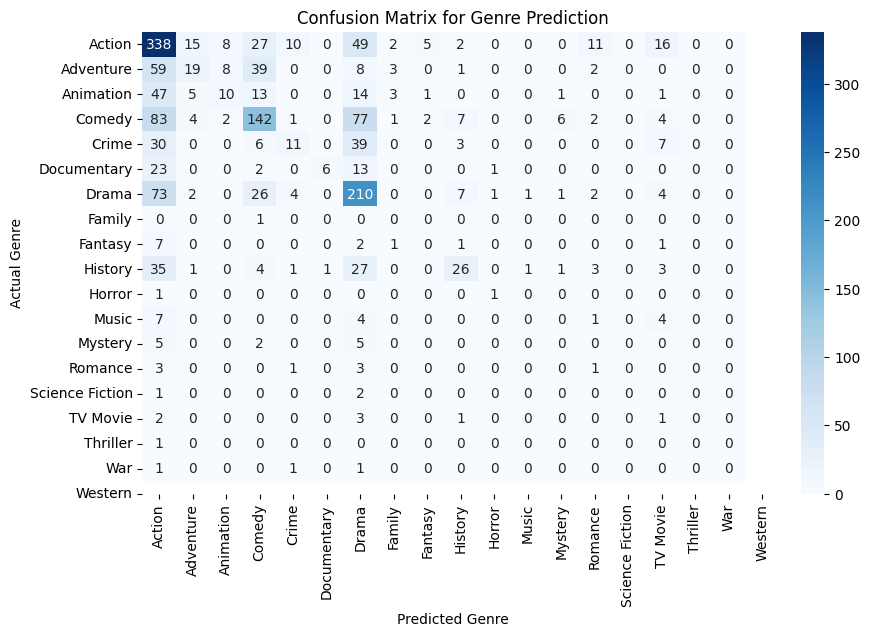

In [41]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=mlb_encoder.classes_, yticklabels=mlb_encoder.classes_)
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Confusion Matrix for Genre Prediction")
plt.show()

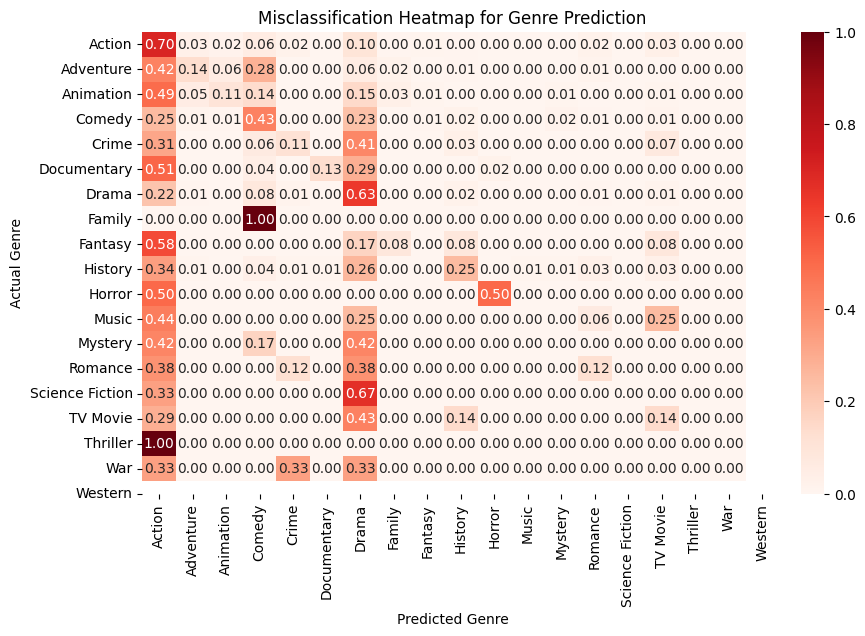

In [42]:
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Reds", xticklabels=mlb_encoder.classes_, yticklabels=mlb_encoder.classes_)
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Misclassification Heatmap for Genre Prediction")
plt.show()

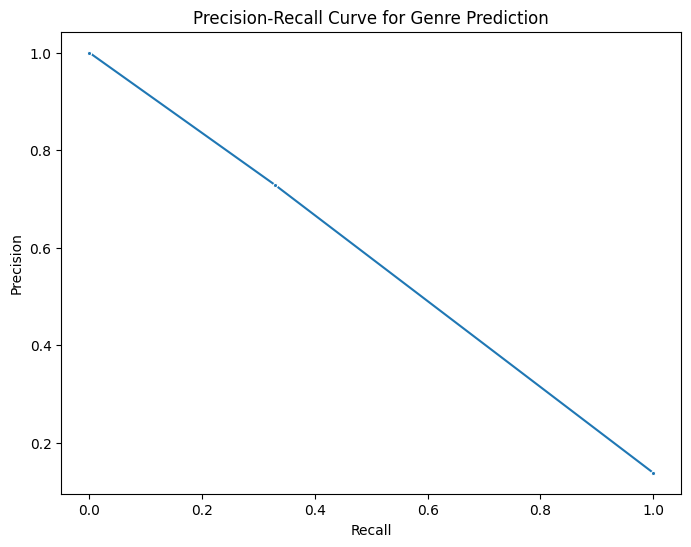

In [43]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test.ravel(), y_pred.ravel())
from sklearn.metrics import precision_recall_curve
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=recall, y=precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Genre Prediction")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = MultiOutputClassifier(OneVsRestClassifier(RandomForestClassifier(n_estimators=100, class_weight='balanced')))
classifier.fit(X_train, y_train)
rforest_y_pred = classifier.predict(X_test)

In [ ]:
print(f1_score(y_test, rforest_y_pred))

0.07523696682464455


In [50]:
from sklearn.svm import SVC
classifier = MultiOutputClassifier(OneVsRestClassifier(SVC(probability=True, class_weight='balanced')))
classifier.fit(X_train, y_train)
svc_y_pred = classifier.predict(X_test)

In [63]:
print(f1_score(y_test, svc_y_pred, average='micro') )     # Good overall measure

0.4765450483991065


In [54]:
from sklearn.tree import DecisionTreeClassifier
classifier = MultiOutputClassifier(OneVsRestClassifier(DecisionTreeClassifier(class_weight='balanced')))
classifier.fit(X_train, y_train)
dtree_y_pred = classifier.predict(X_test)

In [59]:
print(f1_score(y_test, dtree_y_pred, average='micro'))

0.40147086554780315


In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = MultiOutputClassifier(OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5)))
classifier.fit(X_train, y_train)
kclass_y_pred = classifier.predict(X_test)

In [60]:
print(f1_score(y_test, kclass_y_pred, average='micro'))

0.056044180814072406


In [61]:
from sklearn.naive_bayes import GaussianNB
classifier = MultiOutputClassifier(OneVsRestClassifier(GaussianNB()))
classifier.fit(X_train.toarray(), y_train)
gnb_y_pred = classifier.predict(X_test.toarray())

In [62]:
print(f1_score(y_test, gnb_y_pred, average='micro'))

0.3702304495655459
